# 第2回: 関数，微積分，級数展開

## 概要
数理解析の講義の理解に必要な関数・微積分・級数展開について数式とSympyによる実装の両側面から復習する．詳細な定義や解法については微積分学の講義または教科書を参考にされたい．復習にあたり，私が利用した参考書やページは初回の講義にて紹介している．具体的には，以下の内容を復習する．

- 関数：一変数関数，多変数関数について学ぶ．またSympyによる関数の定義，可視化を試みる．
- 微積分：関数の極限，連続性，微分，偏微分について学ぶ．これらの数学的操作をSympyで実装する．
- 級数展開：フーリエ解析の基礎であるフーリエ級数展開の理解のために級数展開について復習する．

## 関数
**関数（function）** とは，ある変数 $x$ について，一つの変数 $y$ に対応させるものである．

$$
y = f(x)
$$

ここで $f(\cdot)$ を関数と呼び，変数 $x$ が取りうる範囲を **定義域（domain）** ，変数 $y$ が取りうる値を **値域（range）** と言う．

具体的には以下のようなものを関数と呼ぶ．

$$
\begin{align}
&y = 2x + 1, \\
&y = x^2 - 1, \\
&x^2 + y^2 = 1
\end{align}
$$

他にもこれまで様々な関数と出会ってきたはずである．また前述したような関数は変数を一つだけ取りうるため一変数関数と呼ばれ，多変数を受け取る多変数関数も考えることができる（後述）．

以降で，Sympyを使って変数を定義して，関数を定義することを試みる．

### 変数
**変数（variable）** とは，任意の範囲で任意の値を取ることができる文字である．具体的には，$y=2x+1$という一次関数があったとき，変数は $x$ と $y$ である．

```{caution}
プログラミングにおける変数と数式の変数は意味が異なる点に注意されたい．以下のようにプログラミングでは，変数に値を代入し，値をメモリ上に確保している．データの型に応じて任意の値を代入可能であるが，$y=2x+1$という数式に現れる変数とは違い，すでに値を代入して式として扱っている点が異なる．
```

In [1]:
x = 1
y = 2 * x + 1

print(f'x={x}, y={y}')

x=1, y=3


本講義で扱うSympyでは，代入をすることなく，文字として変数を扱ったプログラミングが可能である．つまり，これまでの数学の授業で扱ってきたように数式と変数を定義できる．まずはSympyから変数を扱うための`symbols`を`import`する．

In [2]:
from sympy import symbols

Sympyでは以下のように変数を定義する．`print`すると文字式の変数として $x$ が定義されていることがわかる．変数 $x$ には上記の$x=1$のような具体的な値が代入されていないことを確認されたい．

In [3]:
x = symbols('x')

In [4]:
x

x

プログラミングのように変数 $x$ に代入したい場合は，メソッド `式.subs(変数, 代入したい値)`を利用する．

In [5]:
x.subs(x, 1)

1

### 課題
**課題:** Sympyを用いて変数 `var` を作成せよ．また作成した変数 `var` に値 `3.14` を代入せよ．

### 一変数関数
では，定義した$x$ を使って一変数関数を定義する．一変数関数とは，関数 $f(\cdot)$ において取りうる変数の数が一つだけの関数を示す．

$$
y = f(x)
$$

では，数式 $y=2x+1$ を実装する．以下のように書ける．

In [6]:
y = 2 * x + 1

In [7]:
y

2*x + 1

数式として扱われていることがわかるだろう．では，変数 $x$ に $1$ を代入してみる．

In [8]:
y.subs(x, 1)

3

$2 \times 1 + 1 = 3$ と正しく計算されていることがわかる．

### 課題
**課題1:** Sympyを用いて次の関数を実装せよ．必要な変数は自由に定義してよい．

$$
y = \frac{x^2}{2} + 1
$$

**課題2:** 実装した関数を `print` で出力せよ．

**課題3:** SympyはLaTeX形式での出力も可能である．出力用の関数を調べて実行せよ．

### 多変数関数
2以上の正の実数 $n$ に対して，$n$ 個の変数 $x_1, ..., x_n$ を持つ関数　$f(x_1, x_2, ..., x_n)$ を**多変数関数**と呼ぶ．

$$
y = f(x_1, x_2, ..., x_n)
$$

例えば，以下のような2変数 $x, y$ を持つ多変数関数 $f(x, y)$ を考えることができる．
1. $ f(x_1, x_2) = x_{1}^2 + x_{2}^2 $
2. $ f(x_1, x_2) = \cos(x_1) + \sin(x_2) $
3. $ f(x_1, x_2, x_3) = x_{1}^3 + x_{2}^2 + x_{3} + 1 $

では，数式 $y=x_{1}^2 + x_{2}^2$ を実装する．まずは変数 $x_1, x_2$ を定義する．

In [9]:
x_1 = symbols('x_1')
x_2 = symbols('x_2')

続いて，二変数の入力を持つ多変数関数 $f(x_1, x_2)$ を定義する．

In [10]:
y = x_1**2 + x_2**2

In [11]:
y

x_1**2 + x_2**2

定義することができた．一変数関数と同様に代入を行うが，多変数なので`subs`メソッドには辞書形式の引数として与える必要がある．

In [12]:
y.subs({x_1: 1, x_2: 2})

5

次のようにも代入できるが，可読性の面から上記の代入方法を推奨する．

In [13]:
y.subs(x_1, 1).subs(x_2, 2)

5

### 課題
**課題1:** Sympyを用いて次の関数を実装せよ．必要な変数は自由に定義してよい．

$$
f(x_1, x_2, x_3) = x_{1}^3 + x_{2}^2 + x_{3} + 1
$$

**課題2:** 実装した関数を `print` で出力せよ．

**課題3:** SympyはLaTeX形式での出力も可能である．出力用の関数を調べて実行せよ．

### 関数のプロット
関数を扱う際，関数がどのような形を持つかを可視化することは理解の助けとなる．sympyでは便利な`plot`関数が用意されており，定義した関数を容易にプロットすることができる．詳細はsympyの`plotting`モジュールを参考にされたい

#### 一変数関数のプロット
関数 $y=x^2+2x+1$ を定義して，定義域を $[-3, 3]$ でプロットする．

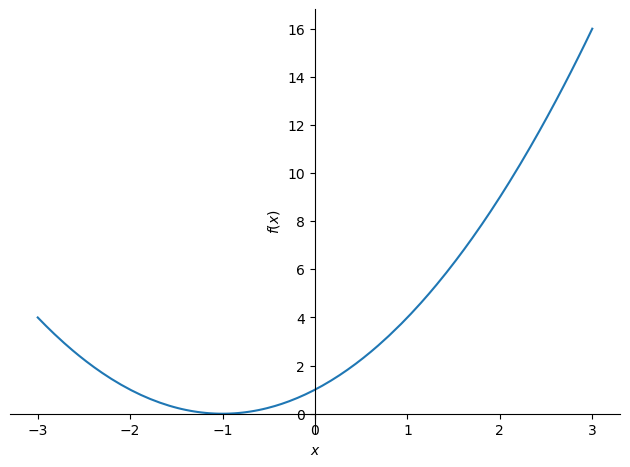

In [14]:
from sympy.plotting import plot
x = symbols('x')
y = x**2 + 2*x + 1
plot(y, (x, -3, 3))

#### 二変数関数のプロット
関数 $y=x_1^2+x_2^2+1$ を定義して，$x_1$ と $x_2$ のそれぞれの定義域を $[-3, 3]$ でプロットする．

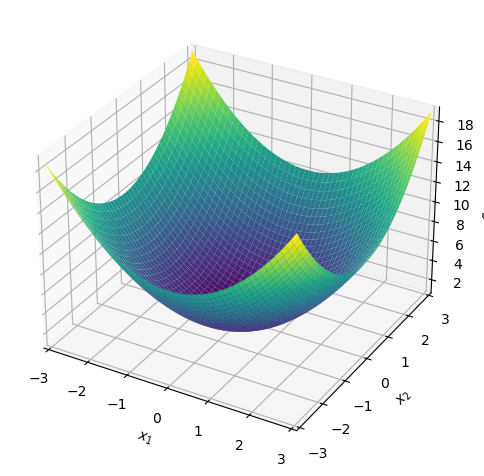

In [15]:
from sympy.plotting import plot3d
x_1 = symbols('x_1')
x_2 = symbols('x_2')
y = x_1**2 + x_2**2 + 1
plot3d(y, (x_1, -3, 3), (x_2, -3, 3))

## 微積分
本講義で扱う微分方程式に **微分** という言葉が含まれていることからもわかるように，微分は関数の性質を知る上で非常に重要な役割を持つ．まずは一変数関数から微分の意味を復習する．

### 微分
これまでの中学〜大学の講義で微分とは関数の傾き・変化量であると習ったはずである．この関数の傾きを知るために，点 $x_1$ で関数 $f$ に接する直線 $g$ を考える．この直線 $g$ は**接線**であった．接線の傾きを知るために，ある二点 $x_1,x_2$を通る直線の傾きを考える．この傾き $a$ は以下の式に示すように増加量で計算することができる．

$$
a=\frac{f\left(x_{2}\right)-f\left(x_{1}\right)}{x_{2}-x_{1}}
$$

$x_1$での傾きを知るために，$x_2$を$x_1$に限りなく近づける．$x_1$を$x$，$x_2-x_1$を$h$として極限を使って表すと，

$$
\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
$$

となる．この極限の値は，$f$の **導関数（derivative）** と呼び，$f'(x)$ または $\frac{df}{dx}$と書く．この導関数を求めることを **微分** するという．

また$f^{(n)}$は$n$階の導関数であり，微分方程式に含まれる導関数の最大の次数 $n$ を微分方程式の階数と呼ぶ．

sympyでは`diff`メソッドを利用すると容易に微分が計算できる．関数 $y=x^2+2x+1$ の一次微分 $f'(x)$ を計算する．

In [16]:
from sympy import diff
x = symbols('x')
f = x**2 + 2*x + 1
f_x = diff(f, x)

In [17]:
f_x

2*x + 2

微分した結果が正しく計算されたことを手計算と併せて確認されたい．

点 $x'$ で関数 $f$ に接する直線（接線） $g$ を求める．微分して接線の傾きが$a$のとき，$g$は以下の式で計算できることを思い出して欲しい．

$$
g = f(x') +  a (x - x')
$$

In [18]:
x_ = 1
g = f.subs({x:x_}) + f_x.subs({x:x_}) * (x - x_)

In [19]:
g

4*x

計算された接線を可視化してみる．

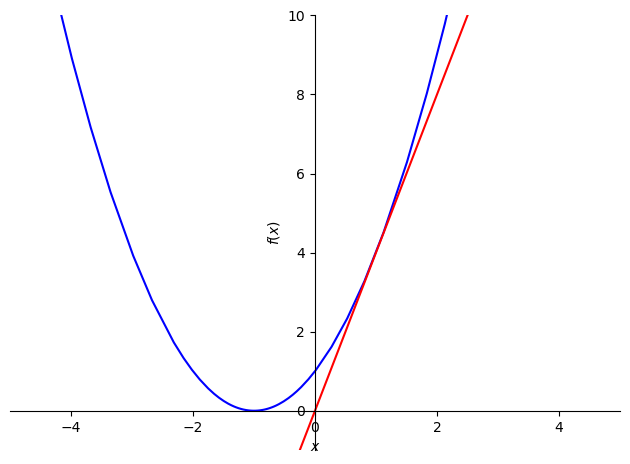

In [20]:
fig = plot(f, g, (x, -10, 10), xlim=(-5, 5), ylim=(-1, 10), show=False)
fig[0].line_color = 'b'
fig[1].line_color = 'r'
fig.show()

### 課題
**課題1:** 次の関数を`x`で微分せよ．

$$
y = \frac{x^2}{3} - x + 1
$$

**課題2:** 次の関数を`t`で微分せよ．

$$
y = t + 1
$$

**課題3:** 次の関数を`x`で微分せよ．またその導関数に値 `2` を代入せよ．

$$
y = 2x^2 + 1
$$

### 偏微分
多変数関数において，ある入力 $x_i$ で微分することを **偏微分 (partial differentiation)** と呼ぶ．変数 $x,y$ を入力として受け取る多変数関数 $f(x,y)$ の偏微分は以下の式で与えられ，偏微分して得られる関数を **偏導関数 (partial derivative)** と呼ぶ．

$$
\begin{array}{l}
\frac{\partial f}{\partial x}(x, y)=\lim _{h \rightarrow 0} \frac{f(x+h, y)-f(x, y)}{h} \\
\frac{\partial f}{\partial y}(x, y)=\lim _{h \rightarrow 0} \frac{f(x, y+h)-f(x, y)}{h}
\end{array}
$$

偏微分を使うと，ある点で局面に接する平面，**接平面(tangent plane)** を書くことができる．そのために，**勾配 (gradient)** $\nabla_f$ を定義する．

$$
\nabla_f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})
$$

偏微分も同様に`diff`メソッドで第二引数に微分対象の変数を指定すれば実行できる．

In [21]:
x = symbols('x')
y = symbols('y')
f = x**2 + y**2 + 1

f_x = diff(f, x)
f_y = diff(f, y)

In [22]:
f_x

2*x

In [23]:
f_y

2*y

微分した結果が正しく計算されたことを手計算と併せて確認されたい．

接平面を求める．関数 $f$ の点(a, b)における接平面の方程式は以下で与えられる．

$$
g(x, y) = f_x(a, b) (x - a) + f_y(a, b) (y - b) + f(a, b)
$$

In [24]:
p = (1, 1)
a, b = p
g = f_x.subs({x:a, y:b}) * (x - a) + f_y.subs({x:a, y:b}) * (y - b) +  f.subs({x:a, y:b})
g

2*x + 2*y - 1

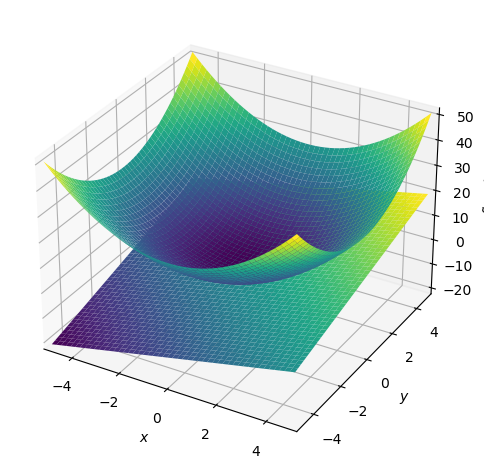

In [25]:
plot3d(f, g, (x, -5, 5), (y, -5, 5))

### 積分
積分を利用することで関数の面積や曲線の長さを計算することができた．積分には積分範囲や被積分関数
に応じていくつかの種類があるが，ここでは数理解析の講義で必要となる不定積分，定積分，広義積分を復習し，実装する．

以下の一変数の二次関数を扱う．関数の定義と変数 $x$ に関する微分を実行する

In [26]:
x = symbols('x')
f = x**2 + 2*x + 1
f

x**2 + 2*x + 1

In [27]:
d_x = diff(f, x)
d_x

2*x + 2

#### 定積分
定積分は与えられた被積分関数 $f(x)$ について，積分区間 $[a,b]$ でその関数の面積を求める方法であった．以下のように，積分変数 $dx$ と積分 $\int$ を使って定積分を書くことができる．

$$
F(x) = \int_{a}^{b} f(x) dx
$$

sympyでは`integrate`関数を使うことで計算できる．被積分関数として微分された式を第一引数に，積分変数と範囲を第二引数として与える．

In [28]:
from sympy import integrate
f_ = integrate(d_x, (x, 0, 5))
f_

35

#### 不定積分
不定積分とは微分すると消える定数 $C$ を積分定数として，元の被積分関数のすべての原始関数を計算する積分である．そのため，複数の解を持つので注意されたい．

$$
F(x) = \int f(x) dx + C
$$

また不定積分は本講義で扱う微分方程式の解を求める際にも必要となるため復習されたい．sympyでは同様に`integrate`関数を使って計算できる．

In [29]:
f_ = integrate(d_x, x)
f_

x**2 + 2*x

#### 広義積分
重要な積分として，広義積分がある．広義積分は積分区間が無限大や発散する点を含む場合に用いられる積分であり，フーリエ変換の導出の際に登場する以下のような積分である．

$$
\begin{align}
F(x) &= \int_{-\infty}^{\infty} f(x) dx, \\
F(x) &= \int_{a}^{\infty} f(x) dx, \\
F(x) &= \int_{-\infty}^{b} f(x) dx
\end{align}
$$

`oo`は無限大を表す．

In [30]:
from sympy import oo
f_ = integrate(d_x, (x, 0, oo))
f_

oo

In [31]:
from sympy import exp
f_ = integrate(exp(-x), (x, 0, oo))
f_

1

```{admonition} 未評価の式の実装
sympyで導関数 $dy/dx$ を定義したいときは `diff` の代わりに `Derivative`クラスを利用すると良い．次回の微分方程式で登場するが，第一引数に式，第二引数に微分する変数を与えることで実装できる．また積分に関しても `integrate` の代わりに `Integral`クラスを利用できる．これらのクラスで定義した式を評価するときは `doit()`メソッドを呼びだす．使い方は[Sympyのチュートリアル](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)が詳しい．
```

### 補足：関数の連続性
関数が連続であるとは，極限 $\lim _{x \rightarrow a} f(x) $ が　$ f(a)$ に一致すること，つまり，
$$\lim _{x \rightarrow a} f(x) = f(a) $$
が成立するときに，関数 $f(x) $ は点　$a$ で連続であると言う．

$a$を1に近づけたとき，$\lim _{x \rightarrow a} f(x) = f(a) $が成立するか検証する

In [32]:
from sympy import limit
x = symbols('x')
f = x**2

a = 1.
g = limit(f, x, a)
g

1.00000000000000

In [33]:
f.subs({x: a})

1.00000000000000

## 級数展開
級数展開はある関数 $f$ を関数の組み合わせで近似する手法である．本講義ではフーリエ解析の基礎として三角関数によるフーリエ級数展開を紹介する．その理解のために，関数を無限級数で近似するテイラー展開について復習する．

### テイラー展開
テイラー展開は，関数を無限級数で近似する手法であり以下のように関数 $f(x)$ をある点 $a$ 周りで近似する．ただし，関数が無限回微分可能である必要性がある．

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2!} + \frac{f'''(a)(x-a)^3}{3!} + \cdots
$$

ここで，$f'$，$f''$，$f'''$などはそれぞれ関数$f$の1次，2次，3次の導関数を表す．

テイラー展開はsympyで`series`関数として実装されており，第一引数には関数を，第二引数に変数を，第三引数にどの点の周りで近似するかを，第四引数に展開の項数を与える．以下は$f(x) = \sin(x)$のテイラー展開の実装である（今回は $x=0$ 周りでの展開なので正確にはマクローリン展開である）．

In [34]:
from sympy import sin, series
x = symbols('x')
f = sin(x)
f_taylor = series(f, x, 0, 7)

In [35]:
f_taylor

x - x**3/6 + x**5/120 + O(x**7)

ここで登場する `removeO()` はグラフプロットのために余剰項を削除するメソッドである．

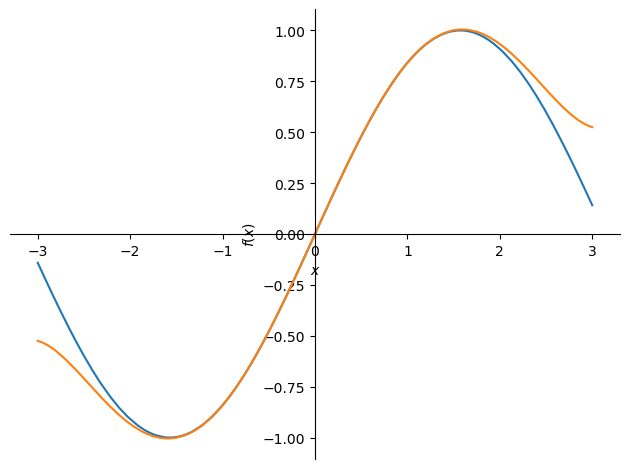

In [36]:
plot(f, f_taylor.removeO(), (x, -3, 3))

### 課題
**課題1:** 任意の関数を定義してマクローリン展開せよ．計算式はこの式に記述せよ．

**課題2:** 定義した関数とマクローリン展開をsympyで実装し，グラフにプロットせよ．

## 次回の講義について
次回は微分方程式の概要とこれまで習った微積分を駆使した解法について説明する．